In [2]:
#### SOURCE: https://www.census.gov/en.html

#### Abstract: 
Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

#### Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))<br>

Prediction task is to determine whether a person makes over 50K a year.


### Attribute Information:

#### Listing of attributes:

>50K, <=50K.<br>

<b>age</b>: continuous.<br>
<b>workclass</b>: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>
<b>fnlwgt</b>: continuous. final weight. In other words, this is the number of people the census believes
the entry represents<br>
<b>education</b>: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
<b>education-num</b>: continuous.<br>
<b>marital-status</b>: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
<b>occupation</b>: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
<b>relationship</b>: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
<b>race</b>: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
<b>sex</b>: Female, Male.<br>
<b>capital-gain</b>: continuous.<br>
<b>capital-loss</b>: continuous.<br>
<b>hours-per-week</b>: continuous.<br>
<b>native-country</b>: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>

#### IMPORTING THE LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [111]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [112]:
from catboost import CatBoostClassifier

#### LOADING THE DATA

In [4]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.shape

(32561, 15)

There are 15 columns and around 33K observations 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are 9 categorical columns and 6 numerical columns

In [7]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### EXPLORING COLUMN NAMES

In [8]:
df.rename(columns = {'education.num':'education_num', 'marital.status':'marital_status', 
                              'capital.gain':'capital_gain','capital.loss':'capital_loss','hours.per.week':'hours_per_week',
                    'native.country':'native_country'}, inplace = True) 

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

#### EXPLORING COLUMN INFORMATION

#### workclass

In [10]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [11]:
#Replacing '?' with NaN
df['workclass'] = df['workclass'].replace({'?':np.nan})

In [12]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [13]:
#Filling null values
df['workclass'].isna().sum()/len(df)*100

5.638647461687294

Around 5% of the column are null values. So we can fill the null values with mode.

In [14]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])

In [15]:
#Formatting
gov = ['Local-gov','State-gov','Federal-gov']
non_gov = ['Private','Self-emp-not-inc','Self-emp-inc']
without_pay = ['Without-pay','Never-worked']

In [16]:
df['workclass'].replace(to_replace = gov, value = 'gov', inplace = True)
df['workclass'].replace(to_replace = non_gov, value = 'non_gov', inplace = True)
df['workclass'].replace(to_replace = without_pay, value = 'without_pay', inplace = True)

In [17]:
df['workclass'].value_counts()

non_gov        28189
gov             4351
without_pay       21
Name: workclass, dtype: int64

#### occupation                

In [21]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [22]:
#Replacing ? with null
df['occupation'] = df['occupation'].replace({'?':np.nan})

In [23]:
#Filling null with mode because categorical value
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

#### native_country

In [24]:
df['native_country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [25]:
#Replacing ? with null
df['native_country'] = df['native_country'].replace({'?':np.nan})

In [26]:
#Filling null with mode because categorical value
df['native_country'] = df['native_country'].fillna(df['native_country'].mode()[0])

#### Marital_status

In [27]:
df['marital_status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [28]:
married = ['Married-civ-spouse',"Divorced","Separated","Widowed","Married-spouse-absent","Married-AF-spouse"]
unmarried = ['Never-married']
df['marital_status'].replace(to_replace = married, value = 'married', inplace = True)
df['marital_status'].replace(to_replace = unmarried, value = 'unmarried', inplace = True)

In [29]:
df['marital_status'].value_counts()

married      21878
unmarried    10683
Name: marital_status, dtype: int64

#### income

In [30]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [31]:
#Formatting target column
#0 - below or equal to 50K
#1 - above 50K
df['income'] = df['income'].replace({'<=50K':0,'>50K':1})

In [32]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

#### education

In [33]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [34]:
school_dropouts = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th']
hs_grad = ['HS-grad']
associate = ['Assoc-voc','Assoc-acdm']
colg = ['Some-college']
df['education'].replace(to_replace = school_dropouts, value = 'school_dropouts', inplace = True)
df['education'].replace(to_replace = hs_grad, value = 'hs_grad', inplace = True)
df['education'].replace(to_replace = associate, value = 'associate', inplace = True)
df['education'].replace(to_replace = colg, value = 'college', inplace = True)

In [35]:
df['education'].value_counts()

hs_grad            10501
college             7291
Bachelors           5355
school_dropouts     4253
associate           2449
Masters             1723
Prof-school          576
Doctorate            413
Name: education, dtype: int64

#### occupation

In [36]:
df['occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [37]:
white_collar = ['Adm-clerical','Exec-managerial','Tech-support']
blue_collar = ['Craft-repair', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Transport-moving']
service = ['Other-service','Priv-house-serv','Protective-serv']
military = ['Armed-Forces']

In [38]:
df['occupation'].replace(to_replace = white_collar, value = 'white_collar', inplace = True)
df['occupation'].replace(to_replace = blue_collar, value = 'blue_collar', inplace = True)
df['occupation'].replace(to_replace = service, value = 'service', inplace = True)
df['occupation'].replace(to_replace = military, value = 'military', inplace = True)

In [39]:
df['occupation'].value_counts()

blue_collar       10062
white_collar       8764
Prof-specialty     5983
service            4093
Sales              3650
military              9
Name: occupation, dtype: int64

#### VISUALIZATION

#### Univariate analysis

In [40]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

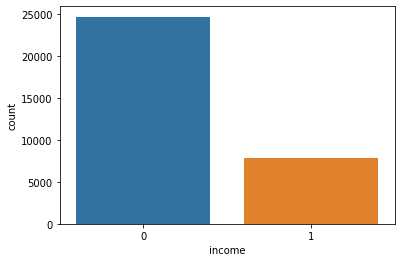

In [41]:
#Target variable
sns.countplot(df['income'])
plt.show()

The number of employees with income less than 50000 is less than the number of employees with income greater than 50000.

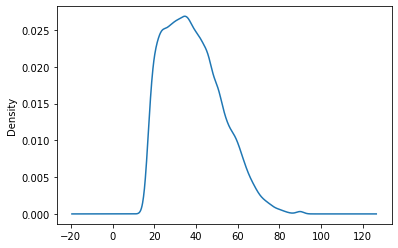

In [42]:
df['age'].plot(kind = 'kde')
plt.show()

The given data contains people in the age range of 17 to 90

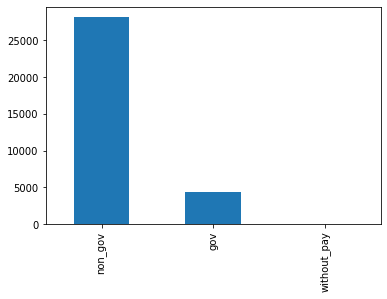

In [43]:
df['workclass'].value_counts().plot(kind = 'bar')
plt.show()

Maximum number of employees are from the non government sector and very less number of people are without pay or have no experience.

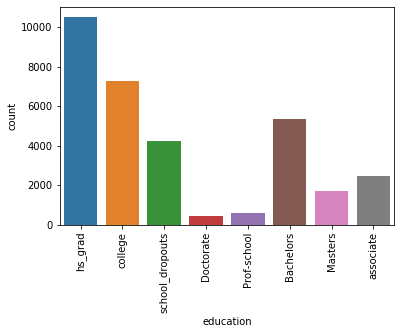

In [44]:
sns.countplot(df['education'])
plt.xticks(rotation = 90)
plt.show()

Many employees have completed the High School graduation and a bare minimum number of employees have completed only preschool. On the contrast, Doctorate or Masters Graduates are very less. 

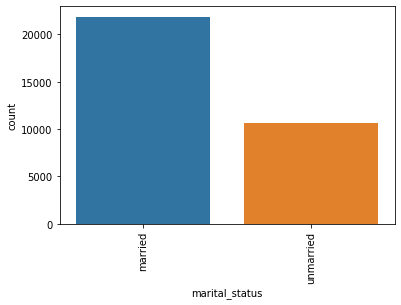

In [45]:
sns.countplot(df['marital_status'])
plt.xticks(rotation = 90)
plt.show()

The number of married people are more than the number of unmarried people.

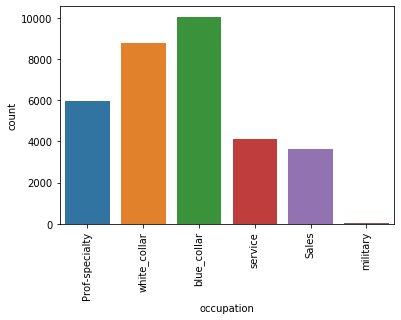

In [46]:
sns.countplot(df['occupation'])
plt.xticks(rotation = 90)
plt.show()

The maximum number of employees are Professors. Very less people are employed with armed forces.

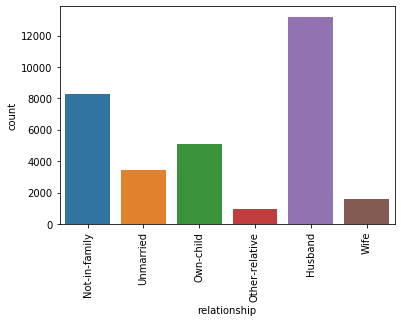

In [47]:
sns.countplot(df['relationship'])
plt.xticks(rotation = 90)
plt.show()

Maximum proportion of relationship is Husband.

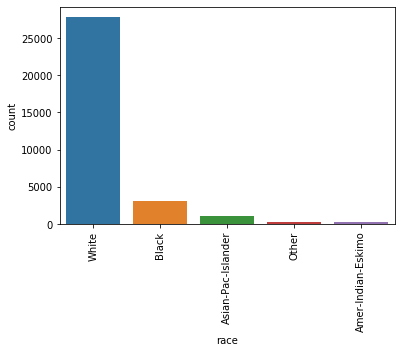

In [48]:
sns.countplot(df['race'])
plt.xticks(rotation = 90)
plt.show()

The dataset contains maximum of white people and bare minimum of American Indian Eskimo people.

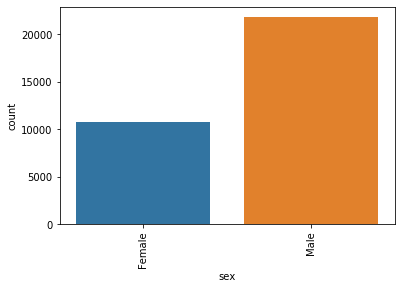

In [49]:
sns.countplot(df['sex'])
plt.xticks(rotation = 90)
plt.show()

Number of males is greater than the number of females.

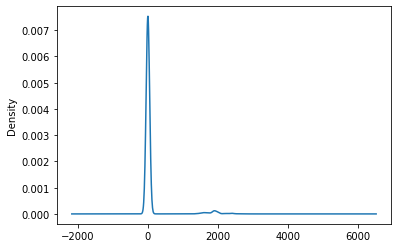

In [50]:
df['capital_loss'].plot(kind = 'kde')
plt.show()

The capital loss value is zero for most of the cases and a few cases at around 2000.

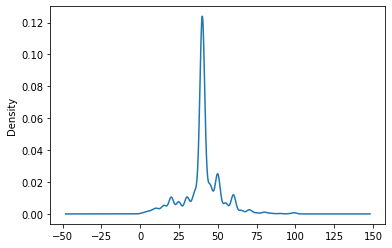

In [51]:
df['hours_per_week'].plot(kind = 'kde')
plt.show()

The range of working hours is between 25 and 60 hours.

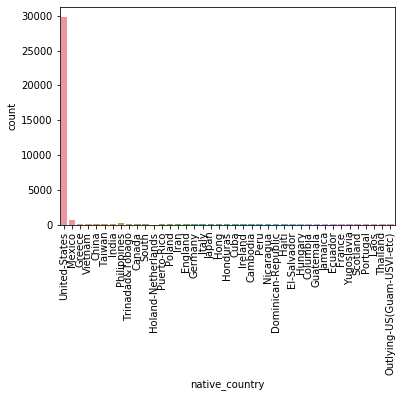

In [52]:
sns.countplot(df['native_country'])
plt.xticks(rotation = 90)
plt.show()

Almost more than 90% of the data is from United States. Other countries have a very less proportion of employees.

#### BIVARIATE ANALYSIS

In [53]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

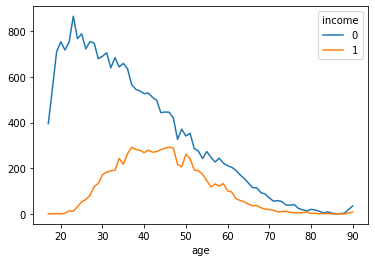

In [54]:
#Age vs Income
ct = pd.crosstab(df['age'],df['income'])
ct.plot(kind = 'line')
plt.show()

Employees in the age category of 20-40 get <= 50K salary in average. Salary range of >50K is in the age range of 35-50.

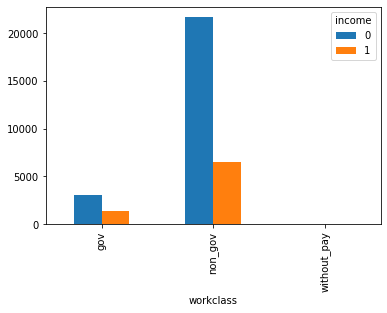

In [55]:
#Workclass vs Income
ct = pd.crosstab(df['workclass'],df['income'])
ct.plot(kind = 'bar')
plt.show()

Except for the Self-employed class, in other classes, the employees with income greater than 50K is less than employees
with income less than 50K. Employees earn more than 50K in private sector.

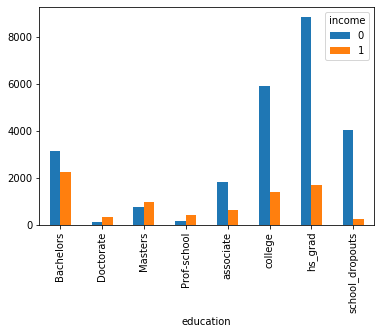

In [56]:
#Education vs Income
ct = pd.crosstab(df['education'],df['income'])
ct.plot(kind = 'bar')
plt.show()

The employees with bachelor degree are the people who have income greater than 50K compared to other educational qualifications.

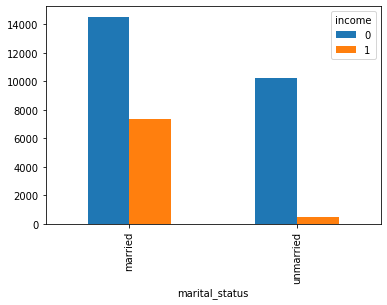

In [57]:
#Marital status vs Income
ct = pd.crosstab(df['marital_status'],df['income'])
ct.plot(kind = 'bar')
plt.show()

The employees who are married earn more the people who are unmarried

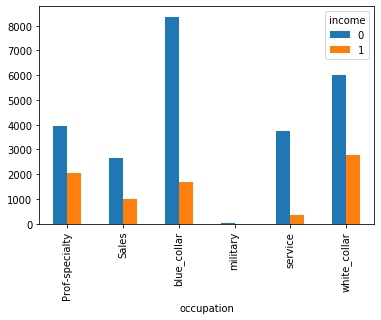

In [58]:
#Occupation vs Income
ct = pd.crosstab(df['occupation'],df['income'])
ct.plot(kind = 'bar')
plt.show()

Employees in the managerial position have qual distribution of <= 50K and >50K. There are very less people who earn more than 50K in Private house service sector.

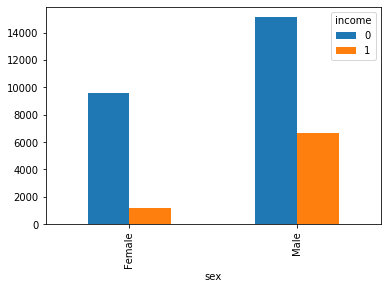

In [59]:
#Sex vs income
ct = pd.crosstab(df['sex'],df['income'])
ct.plot(kind = 'bar')
plt.show()

It is clearly visible that males earn more than females in both the income categories.

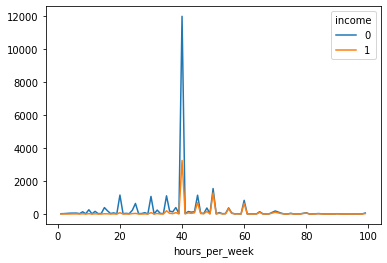

In [60]:
ct = pd.crosstab(df['hours_per_week'],df['income'])
ct.plot(kind = 'line')
plt.show()

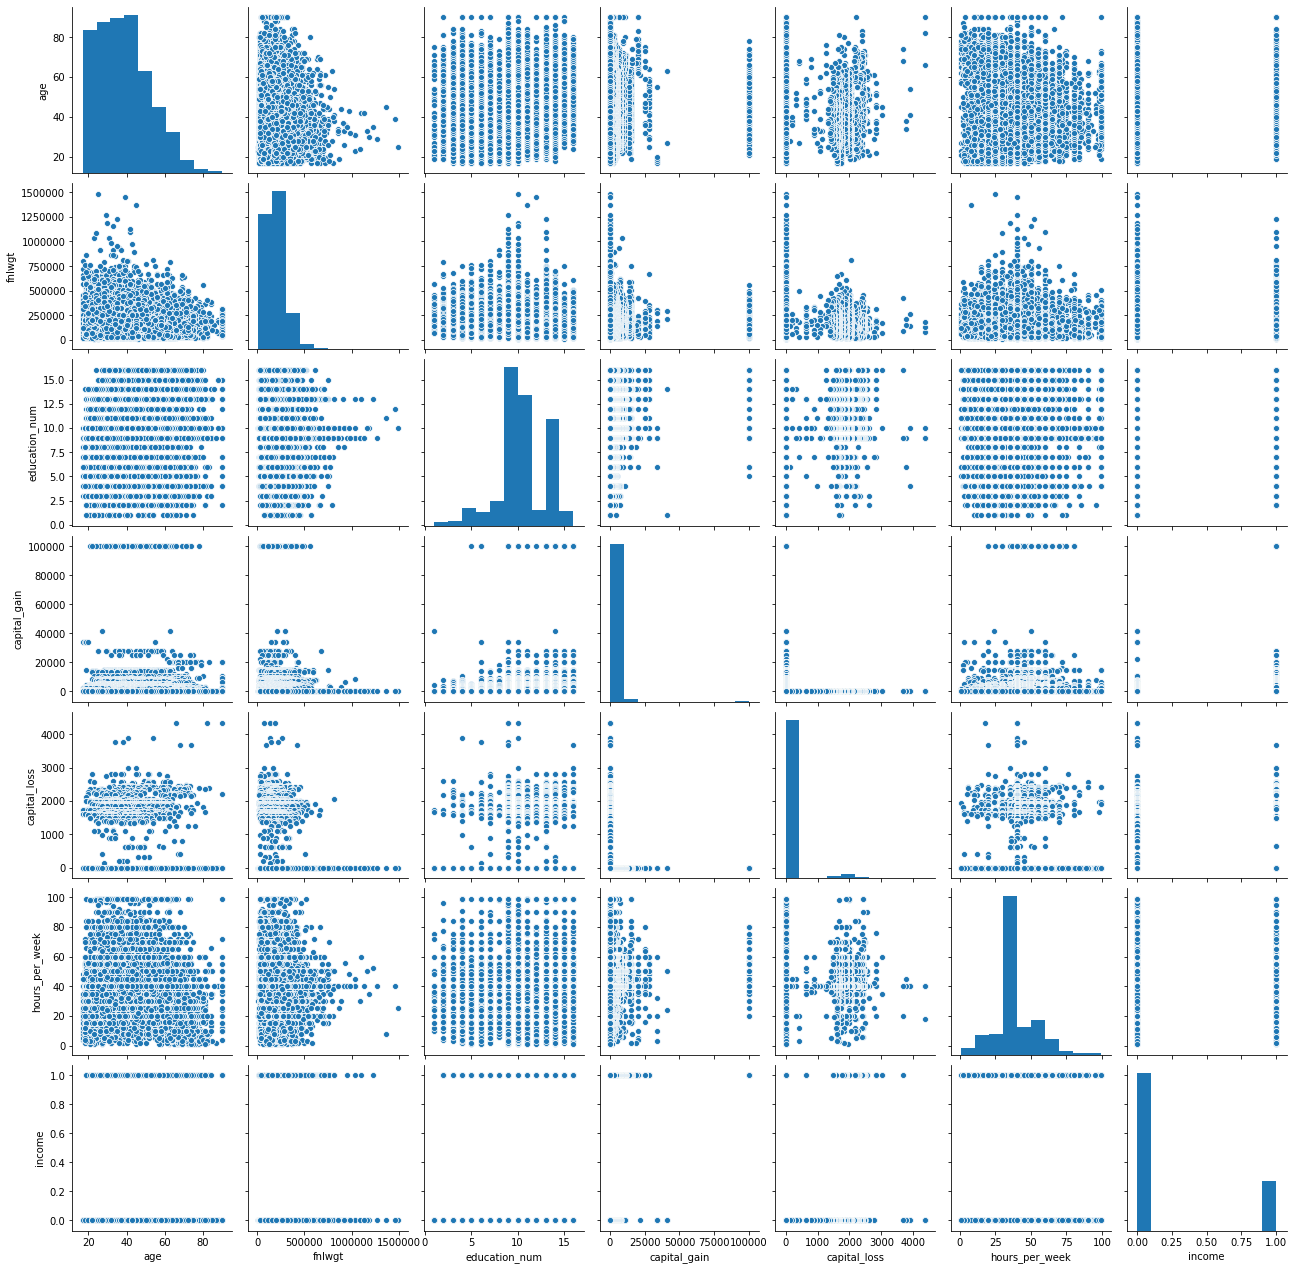

In [61]:
sns.pairplot(df)
plt.show()

In [62]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,non_gov,77053,hs_grad,9,married,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,non_gov,132870,hs_grad,9,married,white_collar,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,non_gov,186061,college,10,married,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,non_gov,140359,school_dropouts,4,married,blue_collar,Unmarried,White,Female,0,3900,40,United-States,0
4,41,non_gov,264663,college,10,married,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


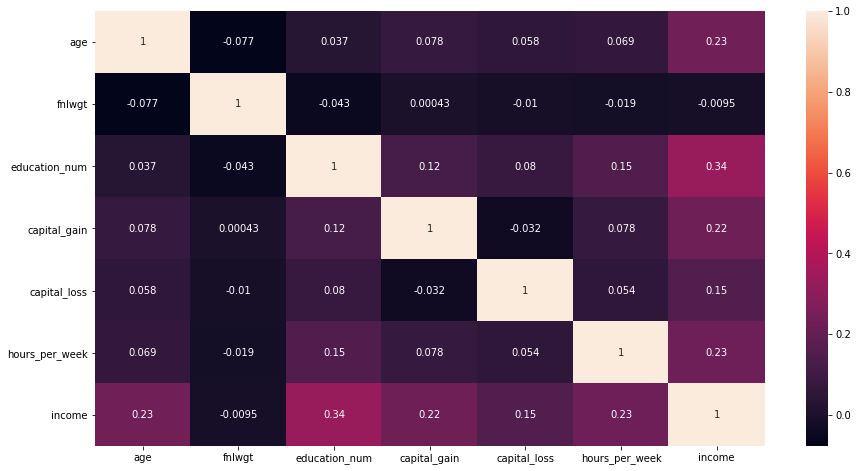

In [63]:
#Correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

There is no severe autocollinearity among independent variables

#### DROPPING UNNECESSARY COLUMNS

fnlwgt and education_num do not yield any significant data

In [64]:
df = df.drop(['fnlwgt','education_num'],axis = 1)

In [65]:
df = df.drop('native_country', axis = 1)

In [66]:
df.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income'],
      dtype='object')

#### ENCODING CATEGORICAL VALUES

In [67]:
df.dtypes

age                int64
workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
income             int64
dtype: object

In [68]:
df.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income'],
      dtype='object')

#### SPLITTING INTO X & Y

In [69]:
X = df.drop('income', axis = 1)
Y = df['income']

In [70]:
cat_cols = X[['workclass','education','marital_status','occupation','relationship','race','sex']]
num_cols = X[['age','capital_gain', 'capital_loss', 'hours_per_week',]]

In [71]:
#LabelEncoder
le = LabelEncoder()
encoded_cols = cat_cols.apply(le.fit_transform)
encoded_cols.head()

,workclass,education,marital_status,occupation,relationship,race,sex
0,1,6,0,0,1,4,0
1,1,6,0,5,1,4,0
2,1,5,0,0,4,2,0
3,1,7,0,2,4,4,0
4,1,5,0,0,3,4,0


In [72]:
df = pd.concat([num_cols, encoded_cols, df[['income']]],axis = 1)
df.head()

,age,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,income
0,90,0,4356,40,1,6,0,0,1,4,0,0
1,82,0,4356,18,1,6,0,5,1,4,0,0
2,66,0,4356,40,1,5,0,0,4,2,0,0
3,54,0,3900,40,1,7,0,2,4,4,0,0
4,41,0,3900,40,1,5,0,0,3,4,0,0


In [73]:
X = df.drop('income',axis = 1)
Y = df['income']

#### TRAIN TEST SPLIT

In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 10)

#### FEATURE SCALING

In [75]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train_scaled = sc_X.fit_transform(xtrain)
x_test_scaled = sc_X.transform(xtest)

##### MODEL BUILDING

#### Logistic Regression

In [76]:
lr = LogisticRegression()
lr.fit(x_train_scaled, ytrain)

LogisticRegression()

In [77]:
y_pred=lr.predict(x_test_scaled)

In [78]:
y_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [79]:
cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
class_report = metrics.classification_report(ytest, y_pred)
print(cnf_matrix)
print(class_report)

[[4628  315]
 [ 815  755]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4943
           1       0.71      0.48      0.57      1570

    accuracy                           0.83      6513
   macro avg       0.78      0.71      0.73      6513
weighted avg       0.82      0.83      0.81      6513



In [80]:
print('Accuracy Metrics:',metrics.accuracy_score(ytest, y_pred))

Accuracy Metrics: 0.8265008444649163


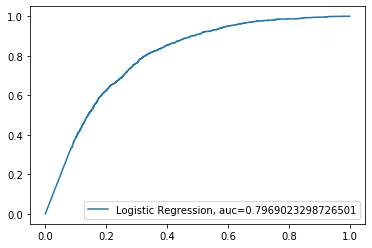

In [81]:
y_pred_proba = lr.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### DECISION TREE

#### GridsearchCV

In [82]:
max_depth_range = [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
min_samples_leaf_range = np.arange(1, 20)
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': max_depth_range},
              {'min_samples_leaf': min_samples_leaf_range}]

In [83]:
clf = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)

In [84]:
clf.fit(x_train_scaled, ytrain)
clf.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [85]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=10)
dt.fit(x_train_scaled, ytrain)

DecisionTreeClassifier(max_depth=10)

In [86]:
y_pred = dt.predict(x_test_scaled)

In [87]:
cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
class_matrix = metrics.classification_report(ytest, y_pred)
print(cnf_matrix)
print(class_matrix)

[[4628  315]
 [ 624  946]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4943
           1       0.75      0.60      0.67      1570

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [88]:
print('Accuracy Metrics:',metrics.accuracy_score(ytest, y_pred))

Accuracy Metrics: 0.8558268079226163


#### KNN

#### Selecting the optimal K value using cross_val

In [89]:
neighbors = list(range(1, 10, 2))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,x_train_scaled,ytrain,cv = 10,scoring =
    "accuracy")
    cv_scores.append(scores.mean())

In [90]:
# Changing to mis classification error
mse = [1-x for x in cv_scores]
# determing best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal no. of neighbors is {}".format(optimal_k))

The optimal no. of neighbors is 9


In [91]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train_scaled, ytrain)

KNeighborsClassifier(n_neighbors=20)

In [92]:
y_pred = knn.predict(x_test_scaled)

In [93]:
cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
class_matrix = metrics.classification_report(ytest, y_pred)
print(cnf_matrix)
print(class_matrix)

[[4608  335]
 [ 715  855]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4943
           1       0.72      0.54      0.62      1570

    accuracy                           0.84      6513
   macro avg       0.79      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513



In [94]:
print('Accuracy Metrics:',metrics.accuracy_score(ytest, y_pred))

Accuracy Metrics: 0.8387839705204975


#### RANDOM FOREST

#### RandomSearchCV

In [95]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [104]:
rf = RandomForestClassifier(n_estimators = 500, max_features = 'auto', max_depth = 40, min_samples_split = 5, min_samples_leaf = 2)
rf.fit(x_train_scaled, ytrain)

RandomForestClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500)

In [105]:
y_pred = rf.predict(x_test_scaled)

In [106]:
print('Accuracy',metrics.accuracy_score(ytest, y_pred))
print('Conf matrix', metrics.confusion_matrix(ytest, y_pred))
print('Class report',metrics.classification_report(ytest, y_pred))

Accuracy 0.8569015814524796
Conf matrix [[4647  296]
 [ 636  934]]
Class report               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4943
           1       0.76      0.59      0.67      1570

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



#### XGBOOST

In [108]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(x_train_scaled,ytrain)
y_pred_xgb=xgboost.predict(x_test_scaled)
print(metrics.accuracy_score(ytest,y_pred_xgb))
print(metrics.confusion_matrix(ytest,y_pred_xgb))
print(metrics.classification_report(ytest,y_pred_xgb))

0.8648856133886074
[[4649  294]
 [ 586  984]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4943
           1       0.77      0.63      0.69      1570

    accuracy                           0.86      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513



#### CATBOOST

In [115]:
param = {
    'depth': 3, 
    'eval_metric': 'F1', 
    'iterations': 3000, 
    'l2_leaf_reg': 1e-19, 
    'loss_function': 'Logloss',
    'early_stopping_rounds': 700
}

# create the model
clf2 = CatBoostClassifier(iterations=param['iterations'],
                        loss_function = param['loss_function'],
                        depth=param['depth'],
                        l2_leaf_reg = param['l2_leaf_reg'],
                        eval_metric = param['eval_metric'],
                        leaf_estimation_iterations = 10,
                        use_best_model=True,
                        early_stopping_rounds=param['early_stopping_rounds']
)

# train the model
clf2.fit(x_train_scaled, 
        ytrain,
        logging_level='Silent',eval_set=(x_test_scaled, ytest)
)

In [116]:
pred_catboost2_train = clf2.predict(x_train_scaled)

In [117]:
print(metrics.classification_report(ytrain, pred_catboost2_train))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     19777
           1       0.80      0.66      0.72      6271

    accuracy                           0.88     26048
   macro avg       0.85      0.80      0.82     26048
weighted avg       0.87      0.88      0.87     26048



In [118]:
pred_catboost2_train = clf2.predict(x_test_scaled)

In [119]:
print(metrics.classification_report(ytest, pred_catboost2_train))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4943
           1       0.79      0.62      0.69      1570

    accuracy                           0.87      6513
   macro avg       0.84      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513

